Double_layer_neural_network

content :
1) Importing library

2) Unziping file and making it in a readable format

3) Visualising data

4) Implmenting double layer neural network

5) Ploting error v/s iteration curve

6) Calculating accuracy on training and testing data
    training-data= 93.33905586240776
    testing_data(activation=sigmoid)= 93.57689362930182
    testing_data(activation=softmax)= 78.5

    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import gzip
import struct

In [2]:
def load_mnist(path, kind='train'):

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte' %kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte' %kind)
    
    with open(labels_path,'rb') as lbpath:
        magic, n = struct.unpack(">II",lbpath.read(8))
        labels=np.fromfile(lbpath,dtype=np.uint8)
    
    with open(images_path,'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
        images=np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels),784)
    return images, labels



In [3]:
X_train, Y_train = load_mnist('/home/sachin/Desktop/assignment_4/', kind='train')
X_train.shape
Y_train.shape

(60000,)

In [4]:
X_test, Y_test = load_mnist('/home/sachin/Desktop/assignment_4/', kind='t10k')
m_train = X_train.shape[0]
m_test = X_test.shape[0]
#print(m_train)
print(m_test)

10000


In [5]:
print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(Y_test.shape))
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))

X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)
Number of training examples: m_train = 60000
Number of testing examples: m_test = 10000


[2732, 43567, 42613, 52416, 45891, 21243, 30403, 32103, 41993]


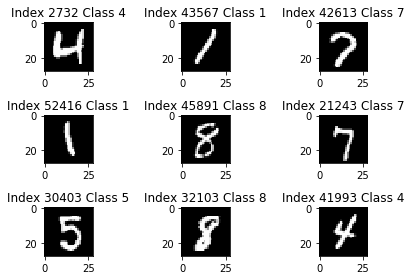

In [6]:
np.random.seed(0);
indices = list(np.random.randint(m_train,size=9))
print(indices)
for i in range(len(indices)):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[indices[i]].reshape(28,28), cmap='gray',interpolation='none' )
    plt.title("Index {} Class {}".format(indices[i], Y_train[indices[i]]))
    plt.tight_layout()


In [7]:
m_train = 59000
m_validation = 1000

mask = list(range(m_train, m_train + m_validation))
X_val = X_train[mask]
y_val = Y_train[mask]

mask = list(range(m_train))
X_train = X_train[mask]
y_train = Y_train[mask]

mask = list(range(m_test))
X_test = X_test[mask]
y_test = Y_test[mask]

In [8]:
X_val.reshape(1000,-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(y_train.shape))
print("X_val shape: " + str(X_val.shape))
print("y_val shape: " + str(y_val.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of validation examples: m_validation = " + str(m_validation))
print ("Number of testing examples: m_test = " + str(m_test))

X_train shape: (59000, 784)
y_train shape: (59000,)
X_val shape: (1000, 784)
y_val shape: (1000,)
X_test shape: (10000, 784)
y_test shape: (10000,)
Number of training examples: m_train = 59000
Number of validation examples: m_validation = 1000
Number of testing examples: m_test = 10000


In [10]:
input_layer_size= 784
hiden_layer_size= 50
output_layer_size=10

In [11]:
def softmax(inputs):
    
    return np.exp(inputs) / (np.sum(np.exp(inputs),axis=0))

def sigmoid(z):
    return 1/(1+np.exp(-z))
def sigmoid_derivative(z):
    return sigmoid(z)*(1-sigmoid(z))

def cost_function(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

 

In [12]:
    
w1= np.random.randn(hiden_layer_size,input_layer_size+1)
w1.shape
w2=np.random.randn(output_layer_size,hiden_layer_size+1)
x_new = np.concatenate((np.ones((len(X_train),1)),X_train),axis=1)
x_new.shape

#print(len(z3))
delta_output=np.zeros((10,51))
delta_hidden=np.zeros((51,785))

# one_hot_encoding

In [16]:
x_one_hot = np.eye(10)[y_train]
x_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
iters=100
alpha=0.1
errors=[]
cost_array=[]
y_hot   =np.eye(10)[y_test]


for i in range (iters):
    # input layer with concatenating one(for bias term)
    a1 = x_new #(59000,785)
    z2 = x_new.dot(w1.T)#(59000,50)
    # hidden layer(values)
    a2 = sigmoid(z2)

    # concatenating one for biasing
    a2_new = np.concatenate((np.ones((len(a2),1)),a2),axis=1)#(59000,51)

    # outpout layer
    z3  = a2_new.dot(w2.T)#(59000,10)
    a3  = sigmoid(z3)#(59000,10)
    
    cost=cost_function(x_one_hot,a3)
    cost_array.append(cost)
    
        
    # error in output layer    
    error_output = a3 -x_one_hot  #(59000,10)

    # error in hidden layer
    err = error_output*sigmoid_derivative(a3) 
    error_layer_1 = np.dot(err,w2)#(59000,51)

    # delta value for output layer
    delta_output += (error_output.T).dot(a2_new)#(10,51)
    #print(delta_output.shape)

    # delta value for hinden layer
    delta_hidden += (error_layer_1.T).dot(a1)#(51,785)
    del_hidden = delta_hidden[1:,:]#(51,785)

    # gradient descendent for input and output value
    dw2 = delta_output/a1.shape[0]
    dw1 = del_hidden/a1.shape[0]

    # updating weight
    w2  = w2-alpha*dw2#(10,51)
    #print(w2.shape)
    w1  = w1-alpha*dw1#(50,785)
    
    error = np.mean(np.abs(error_output))
    errors.append(error)
    accuracy = (1-error)*100
    
    
    
print(a3)   

/home/sachin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


[[3.16291104e-02 1.15911217e-09 9.91783654e-07 ... 2.27027848e-03
  3.38513073e-05 6.73255348e-04]
 [9.96559752e-01 9.34368153e-16 1.65219792e-12 ... 1.68214282e-05
  7.24554511e-09 1.09514470e-05]
 [1.33383076e-08 6.06667742e-06 1.06942147e-04 ... 5.09526933e-06
  4.52961206e-05 2.67874738e-03]
 ...
 [5.80489739e-04 4.45903127e-05 2.73323429e-05 ... 8.60673622e-09
  1.01951978e-01 1.02075081e-03]
 [2.03411190e-06 2.85643580e-10 3.18377948e-06 ... 1.77915583e-06
  1.32785534e-06 8.82301035e-03]
 [3.82501394e-05 3.74715997e-10 1.87795920e-08 ... 9.83525034e-05
  2.62947748e-02 1.30776066e-02]]


In [19]:

print(accuracy)


93.92339695362986


# cost v/s iteration curve

Text(0.5, 1.0, 'cost v/s iteration curve')

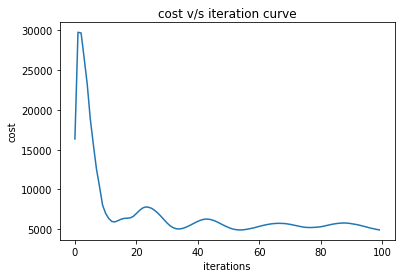

In [23]:
plt.plot(np.arange(100),cost_array)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("cost v/s iteration curve")

# error v/s iteration curve 

Text(0.5, 1.0, 'errors v/s iterations')

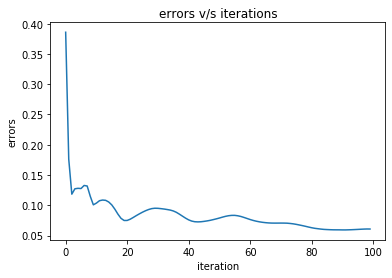

In [24]:
plt.plot(np.arange(100),errors)
plt.xlabel("iteration")
plt.ylabel("errors")
plt.title("errors v/s iterations")

# Predicting on test data

In [25]:


x_test = np.concatenate((np.ones((len(X_test),1)),X_test),axis=1)
z2_test = x_test.dot(w1.T) 
a2_test = sigmoid(z2_test)

a2_new = np.concatenate((np.ones((len(a2_test),1)),a2_test),axis=1)
a2_new.shape
z3_test = a2_new.dot(w2.T)

a3_test = sigmoid(z3_test)
#test=softmax(z3_test)
print(a3_test)

a3_test.shape
    
print(a3_test.shape)

    


[[3.54476881e-06 7.33249989e-15 2.26785190e-13 ... 9.99963099e-01
  2.64544061e-08 4.73572159e-06]
 [2.29330360e-03 3.06984767e-06 2.78977451e-01 ... 2.42638947e-09
  2.24488522e-05 7.85208482e-08]
 [2.01359741e-11 9.99983869e-01 1.84884484e-04 ... 3.18278517e-05
  7.22609571e-06 9.12702483e-06]
 ...
 [1.83938670e-10 3.95425042e-04 5.11449973e-06 ... 1.49378956e-05
  4.99490378e-03 6.54911295e-01]
 [1.19189005e-02 5.88178181e-03 8.01111197e-05 ... 1.11490917e-01
  9.95346181e-01 1.28720391e-02]
 [4.60102326e-03 2.53225674e-06 3.00343870e-02 ... 2.85290192e-08
  4.24486076e-04 7.23164861e-06]]
(10000, 10)


/home/sachin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


In [527]:
y_hot   =np.eye(10)[y_test]
error_test = np.mean(np.abs(y_hot-a3_test))
accuracy = (1-error_test)*100
print(accuracy)

93.57689362930182


In [29]:
def softmax(inputs):
    
    return np.exp(inputs) / (np.sum(np.exp(inputs),axis=0))
lst1=[]
lst2=[]
for i in range(len(a3_test)):
    prob = softmax(z3_test[i])

    lst1.append(np.sum(prob))
    lst2.append(np.argmax(prob))

In [30]:
lst2

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 8,
 4,
 7,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 3,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 3,
 2,
 4,
 6,
 6,
 3,
 5,
 5,
 2,
 0,
 4,
 1,
 9,
 7,
 7,
 8,
 4,
 2,
 7,
 4,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 7,
 9,
 7,
 7,
 6,
 2,
 7,
 5,
 4,
 7,
 5,
 6,
 1,
 3,
 6,
 4,
 3,
 1,
 4,
 9,
 9,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 8,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 9,
 5,
 6,
 7,
 6,
 9,
 9,
 2,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 7,
 1,
 7,
 1,
 8,
 2,
 0,
 6,
 6,
 9,
 5,
 5,
 1,
 6,
 6,
 0,
 3,
 6,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 4,
 1,
 9,
 4,
 7,
 2,
 3,
 2,
 3,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 2,
 9,
 8,
 8,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 5,
 1,
 6,
 4,
 2,
 3,
 2,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 9,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 7,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 9,
 3,
 5,
 0,
 4,
 4,
 6,


In [31]:
sum=0

for i in range(10000):
    if lst2[i]==y_test[i]:
        sum=sum+1
print((sum/10000)*100)        

81.47


In [ ]:
for i in range (iters):